# Supervised Machine Learning Models - REGRESSION PROBLEM - Stored grain DML Predictions

## 2. The Machine Learning Process

In [1]:
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from joblib import dump



In [226]:
np.random.seed(42)


# To change scientific numbers to float (doesnt deal with the model)
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings   
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [227]:
# Used to plot confusion matrix
def plot_obs_pred(Y_test, y_test_pred, curr_model, save=False):
    plt.plot(Y_test, label='Observed', marker='o')
    plt.plot(y_test_pred, label='Predicted', marker='x')
    plt.ylabel('Insect count per kg')
    plt.xlabel('Data points')
    plt.title(f'Observed vs Predicted {curr_model}')
    plt.legend()
    if save==True:
        plt.savefig(f'Confusion matrix {curr_model}')
    plt.show()

## 3. Loading & Investigating the raw data

In [228]:
# loading the raw data

# raw_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//train.csv")
# evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")
# submission_example = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//sample_submission.csv")

raw_data = pd.read_excel("U:\\Python Practice File\\machine_learning\\Insector_Insect Year1 ML.xlsx")
raw_data
print('raw_data', raw_data.shape)
# print('evaluation_data', evaluation_data.shape)
# print('submission_example', submission_example.shape)



raw_data (231, 5)


In [229]:
raw_data.head()

,Week,Season,Grain temp,Grain RH,Insect count per kg
0,1,1,16.7,66.2,0.0
1,2,1,5.4,69.5,0.0
2,3,1,8.9,56.6,0.0
3,4,1,6.9,69.7,0.0
4,5,1,3.3,65.2,0.0


In [230]:
# Checking for null values

raw_data.isnull().sum()

Week                   0
Season                 0
Grain temp             0
Grain RH               0
Insect count per kg    0
dtype: int64

In [231]:
# Vizualizing the dtypes
raw_data.dtypes

Week                     int64
Season                   int64
Grain temp             float64
Grain RH               float64
Insect count per kg    float64
dtype: object

In [232]:
#Descriptive statistics

descriptive_stat = raw_data.describe()
print(descriptive_stat)

kurtosis = raw_data.kurt()
print(kurtosis)

             Week      Season  Grain temp    Grain RH  Insect count per kg
count  231.000000  231.000000  231.000000  231.000000           231.000000
mean    34.575758    2.735931   17.909091   64.702165             0.072695
std     13.600899    1.238674    9.130915    6.657336             0.146996
min      1.000000    1.000000   -6.500000   48.400000             0.000000
25%     29.000000    1.000000   12.400000   59.700000             0.000000
50%     37.000000    3.000000   20.500000   63.800000             0.003562
75%     45.000000    4.000000   24.700000   70.350000             0.073798
max     53.000000    4.000000   31.900000   78.700000             1.178651
Week                   -0.201346
Season                 -1.499613
Grain temp             -0.165497
Grain RH               -0.797911
Insect count per kg    16.442837
dtype: float64


C:\Users\aolenloa\AppData\Local\Temp\ipykernel_2536\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


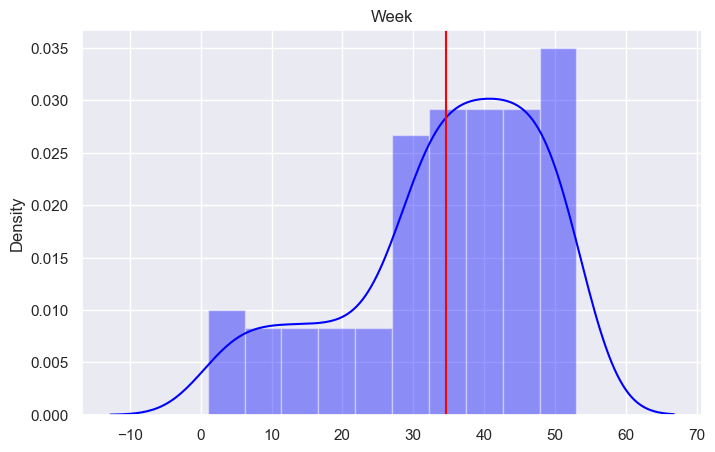

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_2536\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


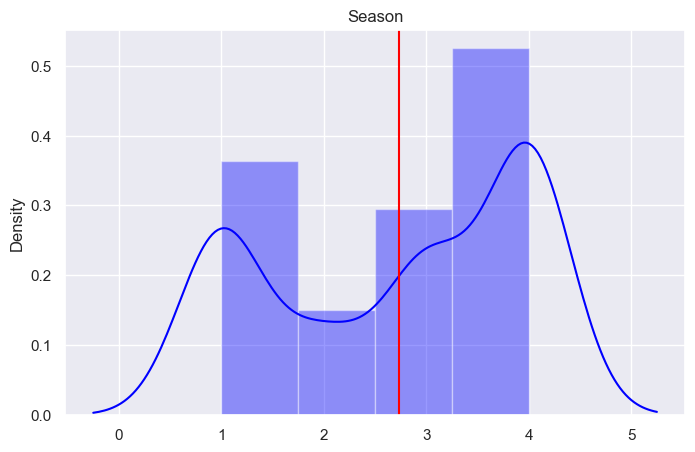

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_2536\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


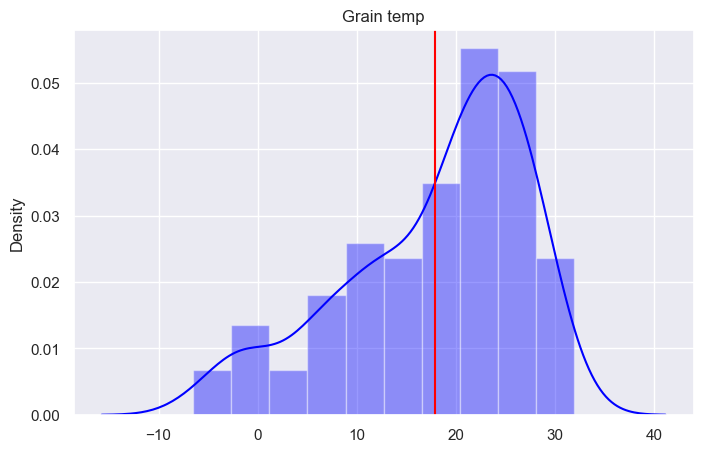

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_2536\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


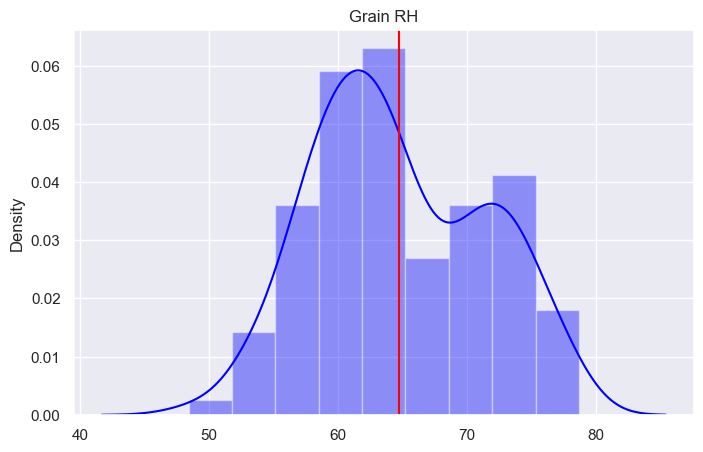

C:\Users\aolenloa\AppData\Local\Temp\ipykernel_2536\489187806.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


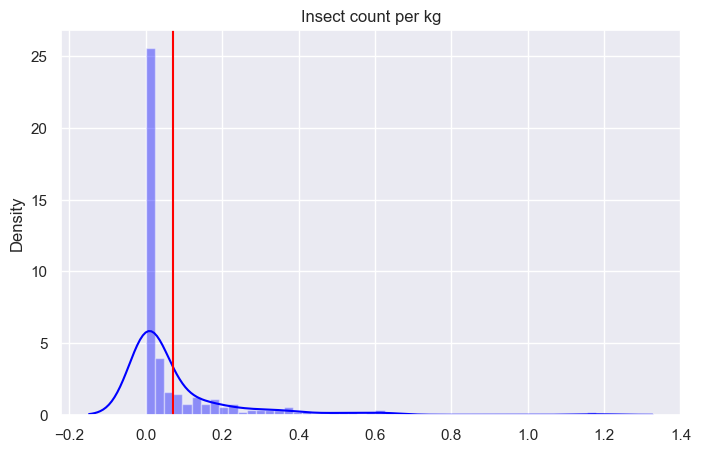

In [233]:

# for n in raw_data.columns:
#     raw_data[n][raw_data[n] == 'Unknown'] = 0
#     raw_data[n] = raw_data[n].astype(float)

# Example 8 - Investigating the distribution 
# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})


for n in raw_data.columns:
    x = raw_data[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = raw_data[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

In [234]:
raw_data.head()

,Week,Season,Grain temp,Grain RH,Insect count per kg
0,1,1,16.7,66.2,0.0
1,2,1,5.4,69.5,0.0
2,3,1,8.9,56.6,0.0
3,4,1,6.9,69.7,0.0
4,5,1,3.3,65.2,0.0


In [235]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    try:
        unique_vals = np.unique(raw_data[column])
    except:
        unique_vals = raw_data[column].unique()
        
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Week :53
The number of values for feature Season :4 -- [1 2 3 4]
The number of values for feature Grain temp :158
The number of values for feature Grain RH :147
The number of values for feature Insect count per kg :131


## 4. Data Cleaning

In [236]:
raw_data

,Week,Season,Grain temp,Grain RH,Insect count per kg
0,1,1,16.7,66.2,0.000000
1,2,1,5.4,69.5,0.000000
2,3,1,8.9,56.6,0.000000
3,4,1,6.9,69.7,0.000000
4,5,1,3.3,65.2,0.000000
...,...,...,...,...,...
226,49,1,23.4,58.0,0.126113
227,50,1,16.1,70.9,0.090717
228,51,1,12.6,72.8,0.272150
229,52,1,11.7,74.3,0.015249


## 5. Selecting the important features

#### Heatmap
- First we need to create a "Dataset" to display on a Heatmap - we will use a correlation dataset
- .corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
- The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease


In [237]:
raw_data.columns

Index(['Week', 'Season', 'Grain temp', 'Grain RH', 'Insect count per kg'], dtype='object')

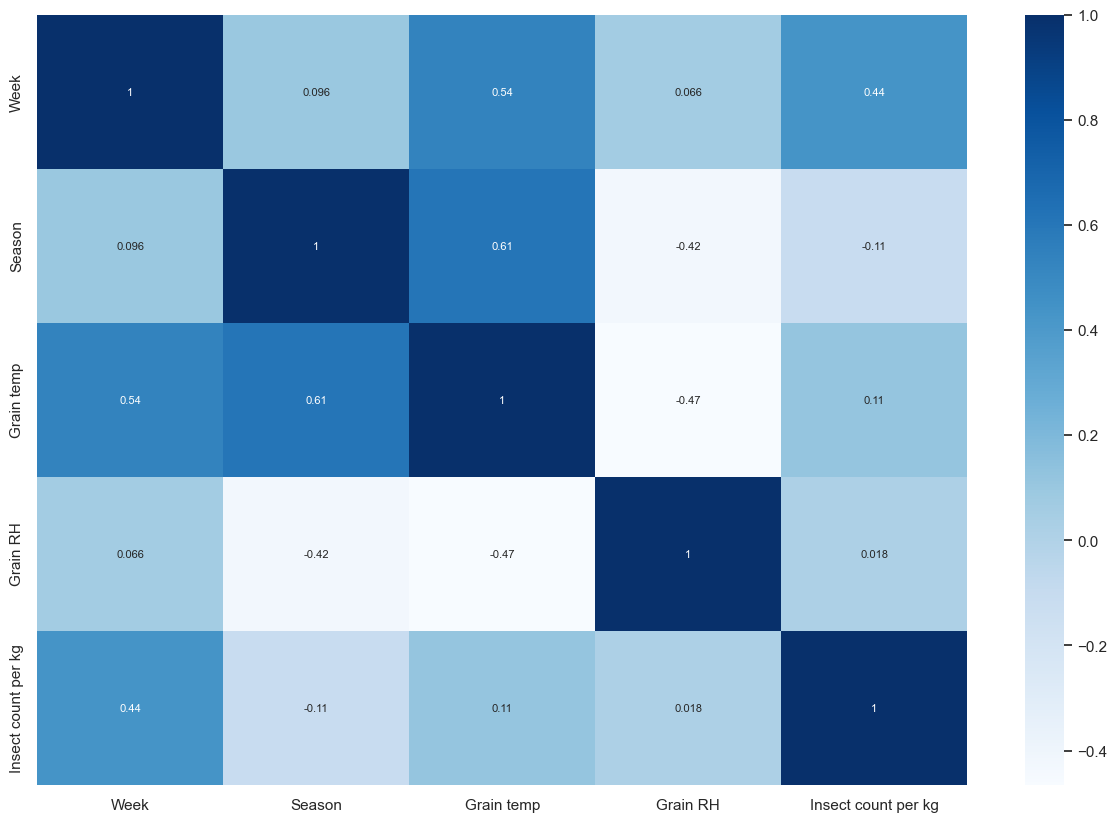

In [238]:
# droping columns we don't need
#del new_raw_data['CarName']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = list(raw_data.columns)

pc = raw_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':8},
                 cmap="Blues")

### Feature Importance

Steps of Running Feature Importance

- Split the data into X & y

- Run a Tree-based estimators (i.e. decision trees & random forests)

- Run Feature Importance

- We measure the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature



In [239]:

# deleting for rerun
try:
    del final_fi
except:
    print("")

# Assuming `raw_data` is your DataFrame, and `y_column` is the target column
y_column='Insect count per kg'


scaler = MinMaxScaler()
# Separate features (X) and target (y)
X_dataframe= raw_data.drop([y_column], axis=1)
X_dataframe[list(X_dataframe.columns)] = scaler.fit_transform(X_dataframe[list(X_dataframe.columns)])
X = X_dataframe.values
y = raw_data[y_column].values  # Ensure y is in the correct format

# X_dataframe



print("Shape of X:", X.shape)
print("Shape of y:", y.shape)



Shape of X: (231, 4)
Shape of y: (231,)


In [240]:

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(
    random_state=42, 
    criterion='squared_error',  # Criterion for regression tasks
    max_depth=10                # Limit tree depth
)

# Train the model
dt.fit(X, y)

# Feature Importance Calculation
final_fi = pd.DataFrame()  # Initialize an empty DataFrame for storing feature importance
for i, column in enumerate(raw_data.drop([y_column], axis=1).columns):
    importance = dt.feature_importances_[i]
    print(f'Importance of feature {column}: {importance:.3f}')
    
    # Append feature importance to the DataFrame
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [importance]})
    try:
        final_fi = pd.concat([final_fi, fi], ignore_index=True)
    except:
        final_fi = fi

# Ordering the feature importance data
final_fi = final_fi.sort_values('Feature Importance Score', ascending=False).reset_index(drop=True)

# Display the final feature importance DataFrame
print(final_fi)

Importance of feature Week: 0.463
Importance of feature Season: 0.070
Importance of feature Grain temp: 0.248
Importance of feature Grain RH: 0.219
     Variable  Feature Importance Score
0        Week                  0.463007
1  Grain temp                  0.248182
2    Grain RH                  0.218717
3      Season                  0.070094


## 5. Training & Running the regression model

In [241]:

#Spliting the data as 
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)


Gradient Boost algorithm 

Best parameters: {'learning_rate': 0.0005, 'max_depth': 3, 'n_estimators': 1500}
Best cross-validation score: -0.02
Mean Squared Error: 0.01214
Root Mean Squared Error: 0.11017
R² Score: 0.3558


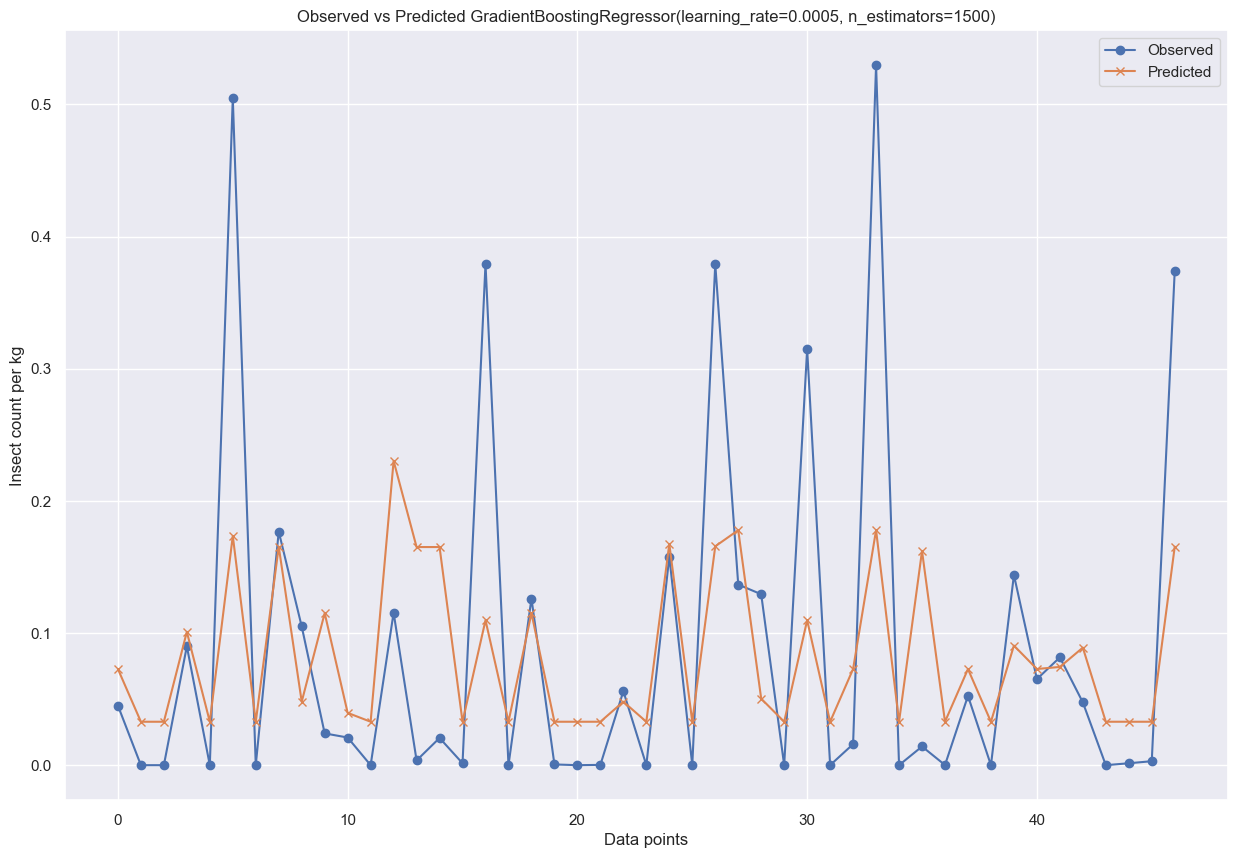

['Insect_Model_developed_GradientBoost_Regression.joblib']

In [242]:
# training and fitting the data
# ----------------------------------------------------------
#  1. GRADIENT BOOST ALGORITHM TRAINING
# ----------------------------------------------------------

#X_Validation, X_test, Y_Validation, Y_test = train_test_split(X_temp,Y_temp, test_size=0.5, random_state=0)

# Define the parameter grid (finding the hyperparamters)
param_grid = {
    'n_estimators': [ 600, 700, 800, 900, 1000, 1500, 2000, 5000],  # Number of boosting stages
    'learning_rate': [0.01, 0.002, 0.0005],  # Shrinks the contribution of each tree
    'max_depth': [3, 4, 5, 6]  # Maximum depth of the individual regression estimators
}

# Create a Gradient Boosting classifier
gbc = GradientBoostingRegressor()

# Set up GridSearchCV (Tuning of the hyperparameters)
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, Y_train) 

# Best parameters and best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test set with the best parameters
gbc_best = GradientBoostingRegressor(**grid_search.best_params_)
gbc_best.fit(X_train, Y_train)
y_test_pred = gbc_best.predict(X_test)


# Evaluate the model
mse = mean_squared_error(Y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_test_pred)

print(f"Mean Squared Error: {mse:.5f}")
print(f"Root Mean Squared Error: {rmse:.5f}")
print(f"R² Score: {r2:.4f}")


plot_obs_pred(Y_test, y_test_pred, gbc_best, save=False)

model_filename = 'Insect_Model_developed_GradientBoost_Regression.joblib'
dump(gbc_best, model_filename)

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits
Best parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 135}
Best cross-validation score: 0.01
Test MSE: 0.01073
Test RMSE: 0.10357
Test R²: 0.4307


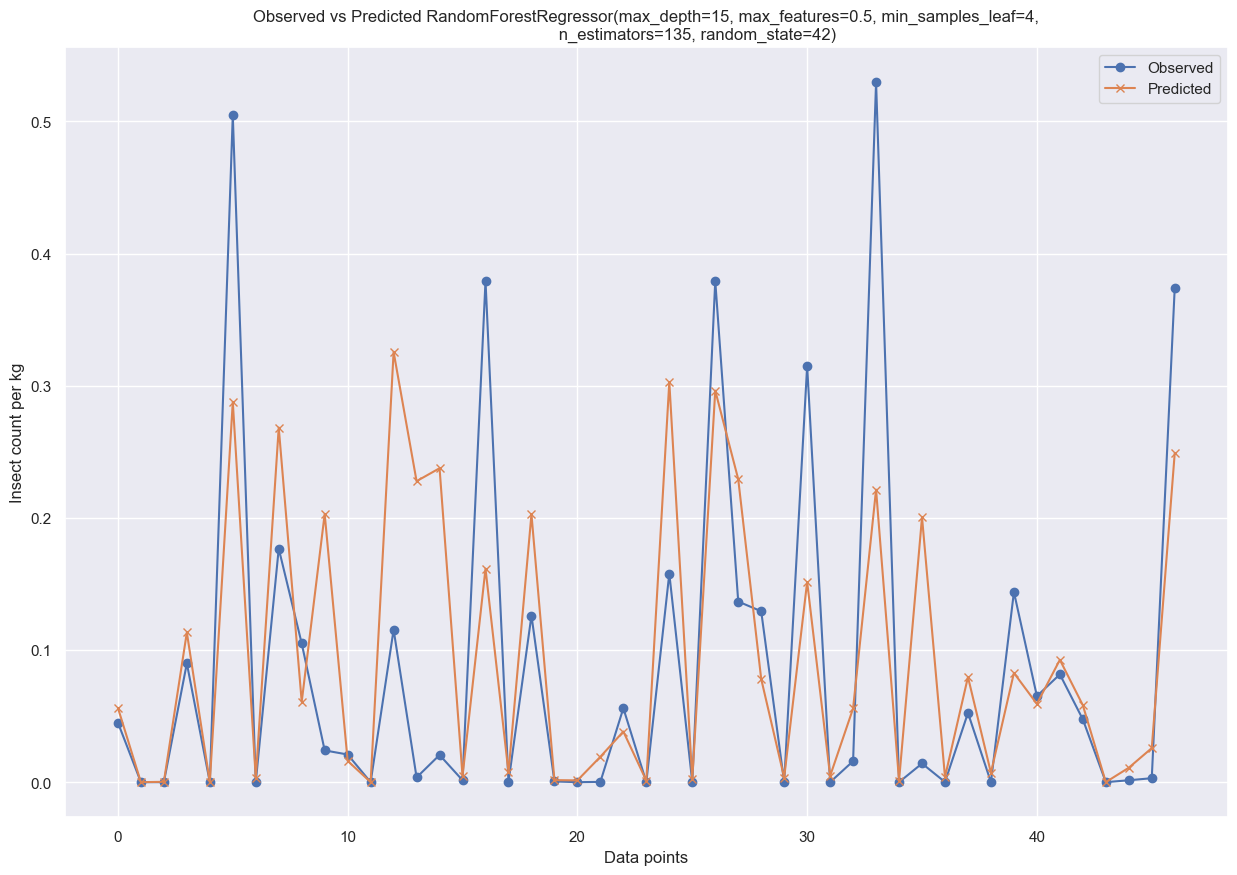

In [243]:
# training and fitting the data
# ----------------------------------------------------------
#    2. RANDOM FOREST ALGORITHM TRAINING
# ----------------------------------------------------------


# Hyperparameter grid
n_estimators = [int(x) for x in np.linspace(start=5, stop=200, num=10)]
max_features = [0.5, 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(5, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap,
}

# Initialize the RandomForestRegressor
rfc = RandomForestRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters and cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(-grid_search.best_score_))  # MSE is negative

# Evaluate on the test set with the best parameters
rfc_best = RandomForestRegressor(**grid_search.best_params_, random_state=42)
rfc_best.fit(X_train, Y_train)
y_test_pred = rfc_best.predict(X_test)

# Model evaluation
mse = mean_squared_error(Y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_test_pred)

print(f"Test MSE: {mse:.5f}")
print(f"Test RMSE: {rmse:.5f}")
print(f"Test R²: {r2:.4f}")


plot_obs_pred(Y_test, y_test_pred, rfc_best, save=False)


# ****************************************************************************************************
# ****************************************************************************************************
# ****************************************************************************************************


In [244]:
# # training and fitting the data
#  # train random forest training algorithm

# save the model to a file #GBC means GradientBoostingClassifier algorithm

model_filename = 'Insect_Model_developed_RandomForestRegression.joblib'
dump(rfc_best, model_filename)


['Insect_Model_developed_RandomForestRegression.joblib']

Best parameters: {'criterion': 'poisson', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: -0.02
Test MSE: 0.0209
Test RMSE: 0.1445
Test R²: -0.1083


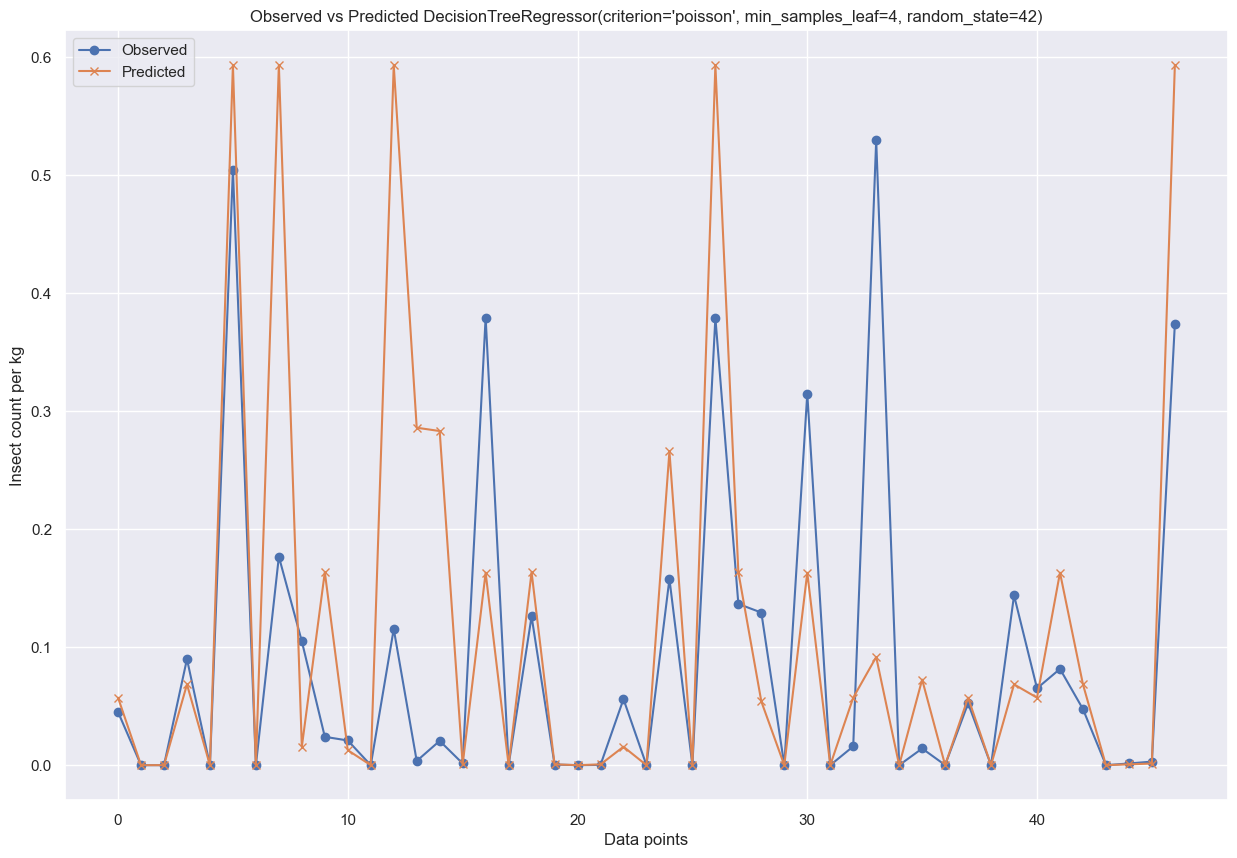

['Insect_Model_developed_Decision_TreeRegression.joblib']

In [245]:
# training and fitting the data
# ----------------------------------------------------------
#    3. DECISION TREE CLASSIFIER ALGORITHM TRAINING
# ----------------------------------------------------------

# Define the parameter grid
param_grid = {
'max_depth': [None, 10, 20, 30, 40], # Maximum depth of the tree
'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
'min_samples_leaf': [1, 2, 4], # Minimum number of samples required at a leaf node
'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'] # Function to measure the quality of a split
}

# Create a Decision Tree classifier
dt = DecisionTreeRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Best parameters and best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test set with the best parameters
dt_best = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)
dt_best.fit(X_train, Y_train)
y_test_pred = dt_best.predict(X_test)


# Model evaluation
mse = mean_squared_error(Y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_test_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


plot_obs_pred(Y_test, y_test_pred, dt_best, save=False)

model_filename = 'Insect_Model_developed_Decision_TreeRegression.joblib'
dump(dt_best, model_filename)



Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.29
Test MSE: 0.01676
Test RMSE: 0.12947
Test R²: 0.1103


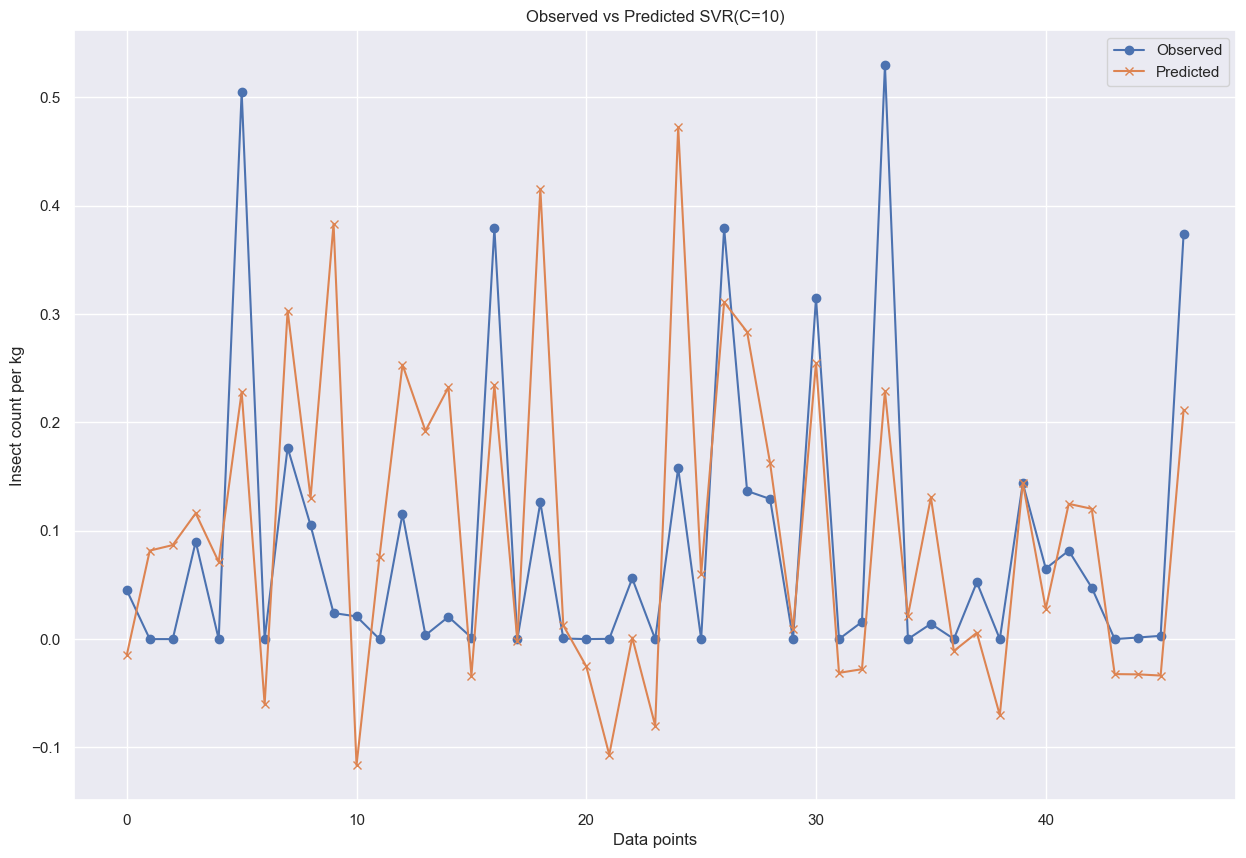

In [246]:
# training and fitting the data
# ----------------------------------------------------------
#   4. SVM CLASSIFIER ALGORITHM TRAINING
# ----------------------------------------------------------


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': ['scale','auto'], 
              'kernel': ['rbf','poly', 'linear','sigmoid']}  
svm=SVR()
grid_search = GridSearchCV(svm, param_grid, cv=5) 
  
# fitting the model for grid search 
grid_search.fit(X_train, Y_train) 

print("Best parameters:", grid_search.best_params_) 
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_)) # Evaluate on the test set with the best parameters 

svm_best = SVR(**grid_search.best_params_) 
svm_best.fit(X_train, Y_train) 
y_test_pred = svm_best.predict(X_test) 

# Model evaluation
mse = mean_squared_error(Y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_test_pred)

print(f"Test MSE: {mse:.5f}")
print(f"Test RMSE: {rmse:.5f}")
print(f"Test R²: {r2:.4f}")


plot_obs_pred(Y_test, y_test_pred, svm_best, save=False)

In [247]:
model_filename = 'Insect_Model_developed_SVR.joblib'
dump(svm_best, model_filename)



['Insect_Model_developed_SVR.joblib']

In [248]:
# --------------------------------------------------------------------------------------------------------------------------------------------------------
# 
#       ENDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD 
#         ENDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD 
#           ENDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD 
#               ENDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD 
# ------------------------------------------------------------------------------------------------------------------------------------------------------------


: 